In [52]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [54]:
# Load data
df = pd.read_csv("output.csv")
df

,cheerful.,nice.,delicious.,park,look,read,mondays.,raini,sad.,book,...,it.,food,disaster.,happy.,loud.,smell,stand,rude.,cook.,SENTIMENT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive
5025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,negative
5026,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
5027,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [55]:
# Map sentiment values to numeric values
df['SENTIMENT'] = df['SENTIMENT'].replace({'positive': 1, 'negative': -1, 'neutral': 0})
df

C:\Users\Hp\AppData\Local\Temp\ipykernel_11984\1407938206.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SENTIMENT'] = df['SENTIMENT'].replace({'positive': 1, 'negative': -1, 'neutral': 0})


,cheerful.,nice.,delicious.,park,look,read,mondays.,raini,sad.,book,...,it.,food,disaster.,happy.,loud.,smell,stand,rude.,cook.,SENTIMENT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-1
5026,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5027,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [57]:
# Initialize parameters
num_iterations = 1500
learning_rate = 0.01
costs = []

In [58]:
# Define number of classes
num_classes = len(df['SENTIMENT'].unique())

# Extract features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Initialize weights and biases for each class randomly
weights = np.random.rand(num_classes, X.shape[1])
biases = np.random.rand(num_classes)
weights,biases,weights.shape

(array([[0.92065588, 0.86722727, 0.28189304, 0.74135897, 0.25850217,
         0.83899664, 0.36318285, 0.50016956, 0.55694677, 0.87584271,
         0.00869727, 0.92600043, 0.86864964, 0.92988777, 0.06914086,
         0.61176545, 0.56708657, 0.79660427, 0.11192903, 0.53934211,
         0.40460093, 0.86733207, 0.45959433, 0.99556043, 0.93195538,
         0.16008163, 0.24576127, 0.28524783, 0.20740522, 0.57129824,
         0.34707321, 0.70905061, 0.46848658, 0.0467388 , 0.13400891,
         0.69763794, 0.32900383, 0.93954726, 0.7174121 , 0.59986653,
         0.63822005, 0.20394937, 0.67552133, 0.21756491, 0.08638056,
         0.57700893, 0.04803393, 0.97926321, 0.57913661, 0.42533453,
         0.6545982 , 0.17292197, 0.8847044 , 0.57221729, 0.50447231,
         0.3600657 , 0.04400815, 0.55318249, 0.81781909, 0.98372402,
         0.3798146 , 0.00843341, 0.3407152 , 0.27885615, 0.78854635,
         0.90057377, 0.12092478, 0.19867006, 0.38084582, 0.0725428 ,
         0.53568958, 0.49590995, 0

In [59]:
df['SENTIMENT'].unique()

array([ 1, -1], dtype=int64)

In [60]:
# Split data into train and test sets
split_ratio = 0.85
split_index = int(len(df) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the model
num_iterations = 1500
learning_rate = 0.01
costs_class = [[] for _ in range(num_classes)]



In [61]:
for class_label in range(num_classes):
    binary_labels = np.where(y_train == class_label, 1, 0)
    for i in range(num_iterations):
        z = np.dot(X_train, weights[class_label]) + biases[class_label]
        y_pred = sigmoid(z)
        cost = -np.mean(binary_labels * np.log(y_pred) + (1 - binary_labels) * np.log(1 - y_pred))
        costs_class[class_label].append(cost)
        dw = (1 / len(X_train)) * np.dot(X_train.T, (y_pred - binary_labels))
        db = (1 / len(X_train)) * np.sum(y_pred - binary_labels)
        weights[class_label] -= learning_rate * dw
        biases[class_label] -= learning_rate * db
        # Print cost at every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Class {class_label}, Iteration {i+1}: Cost = {cost}")
            print(weights, biases)
            

Class 0, Iteration 100: Cost = 1.1070413296853954
[[0.88421931 0.84451567 0.25608422 0.73314831 0.25850217 0.83899664
  0.36318285 0.50016956 0.54351563 0.85137537 0.00869727 0.92600043
  0.84647535 0.92252452 0.06341828 0.60401237 0.55943945 0.78831512
  0.10478112 0.52506755 0.39175937 0.86733207 0.44653588 0.9880968
  0.93195538 0.15416129 0.23864572 0.27016248 0.19978439 0.55757406
  0.34707321 0.70098019 0.46848658 0.02975908 0.12007541 0.69065988
  0.3227288  0.93156917 0.70318646 0.58627586 0.63822005 0.20394937
  0.66858237 0.19947689 0.07210445 0.57024912 0.04116575 0.97165334
  0.56562262 0.41241067 0.64769662 0.16697405 0.87641525 0.55872906
  0.49124023 0.35254202 0.03834095 0.5397655  0.81781909 0.98372402
  0.37254332 0.00843341 0.3407152  0.27194971 0.78854635 0.89295293
  0.11331491 0.1866779  0.38084582 0.05881862 0.53568958 0.48863867
  0.44662508 0.37528296 0.69574031 0.58544185 0.55208075 0.18515568
  0.15129271 0.7371333  0.47663991 0.67427993 0.58557684 0.54318274

In [62]:
# Predict classes for X_test
def predict(X):
    z = np.dot(X, weights.T) + biases
    y_pred = sigmoid(z)
    predicted_classes = np.argmax(y_pred, axis=1)
    return predicted_classes

predicted_classes = predict(X_test)
predicted_classes


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
# Calculate evaluation metrics without sklearn
def calculate_metrics(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = np.sum(y_true == y_pred) / len(y_true)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1

# Example usage:
accuracy_manual, precision_manual, recall_manual, f1_manual = calculate_metrics(y_test, predicted_classes)

print("Accuracy (Manual):", accuracy_manual)
print("Precision (Manual):", precision_manual)
print("Recall (Manual):", recall_manual)
print("F1-score (Manual):", f1_manual)
conf_matrix = confusion_matrix(y_test, predicted_classes)
print(conf_matrix )

Accuracy (Manual): 0.5337748344370861
Precision (Manual): 1.0
Recall (Manual): 1.0
F1-score (Manual): 1.0
[[  0 352]
 [  0 403]]


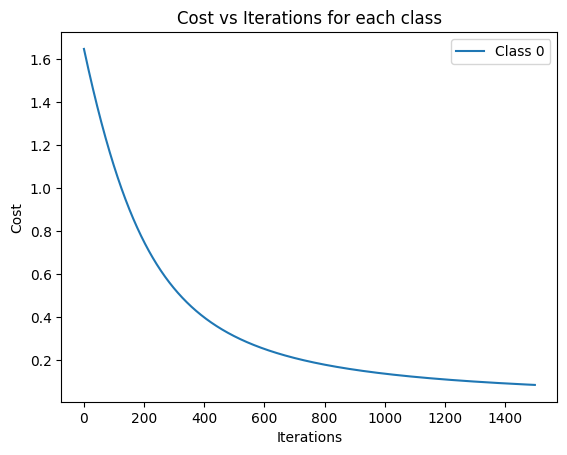

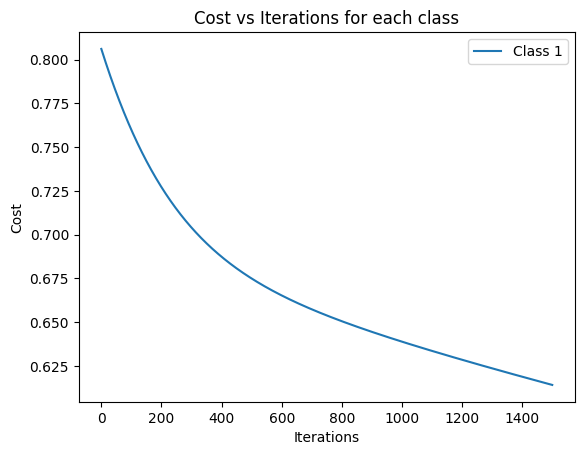

In [64]:
# Plot cost vs iterations for each class
for class_label in range(num_classes):
    plt.plot(range(num_iterations), costs_class[class_label], label=f"Class {class_label}")
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs Iterations for each class')
    plt.legend()
    plt.show()



In [65]:
# Predict class label for a single instance
def predict_single(instance):
    z = np.dot(instance, weights.T) + biases
    y_pred = sigmoid(z)
    predicted_class = np.argmax(y_pred)
    return predicted_class

In [66]:
# Example usage:
example_instance = df.iloc[289, :-1].values
predicted_class = predict_single(example_instance)
print("Predicted class for example instance:", predicted_class)

# If the model predicts all classes as 0, adjust the predict function accordingly
class_counts = np.bincount(predicted_classes)
if np.sum(class_counts) == class_counts[0]:
    print("Model predicts all classes as 0. Adjusting predict function...")
    def predict(X):
        return np.zeros(X.shape[0], dtype=int)  # Predict all classes as 0
    

Predicted class for example instance: 1


In [67]:
df.iloc[289]

cheerful.     0
nice.         0
delicious.    0
park          0
look          0
             ..
smell         0
stand         0
rude.         0
cook.         0
SENTIMENT    -1
Name: 289, Length: 114, dtype: int64

Class 0: Neutral
Class 1: Positive
Class 2: Negative

In [68]:
# Example usage:
example_instance = df.iloc[2815, :-1].values
predicted_class = predict_single(example_instance)
print("Predicted class for example instance:", predicted_class)

# If the model predicts all classes as 0, adjust the predict function accordingly
class_counts = np.bincount(predicted_classes)
if np.sum(class_counts) == class_counts[0]:
    print("Model predicts all classes as 0. Adjusting predict function...")
    def predict(X):
        return np.zeros(X.shape[0], dtype=int)  # Predict all classes as 0
    

Predicted class for example instance: 1


In [69]:
df.iloc[2815]

cheerful.     0
nice.         0
delicious.    0
park          0
look          0
             ..
smell         0
stand         0
rude.         0
cook.         0
SENTIMENT     1
Name: 2815, Length: 114, dtype: int64